In [1]:
! pip install kaggle

In [5]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download mohamedhanyyy/chest-ctscan-images

 85% 101M/119M [00:00<00:00, 135MB/s] 
100% 119M/119M [00:00<00:00, 144MB/s]


In [13]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2
import os
from zipfile import ZipFile

In [14]:
zipfile = "chest-ctscan-images.zip"
with ZipFile(zipfile, 'r') as zip:
  zip.printdir()
  zip.extractall()

File Name                                             Modified             Size
Data/test/adenocarcinoma/000108 (3).png        2020-08-20 18:49:36        83473
Data/test/adenocarcinoma/000109 (2).png        2020-08-20 18:49:36       113777
Data/test/adenocarcinoma/000109 (4).png        2020-08-20 18:49:36       121202
Data/test/adenocarcinoma/000109 (5).png        2020-08-20 18:49:36       133848
Data/test/adenocarcinoma/000112 (2).png        2020-08-20 18:49:36       106831
Data/test/adenocarcinoma/000113 (7).png        2020-08-20 18:49:36       114466
Data/test/adenocarcinoma/000114 (5).png        2020-08-20 18:49:36        98419
Data/test/adenocarcinoma/000114.png            2020-08-20 18:49:38        74286
Data/test/adenocarcinoma/000115 (4).png        2020-08-20 18:49:38       117349
Data/test/adenocarcinoma/000115 (8).png        2020-08-20 18:49:38       103435
Data/test/adenocarcinoma/000115.png            2020-08-20 18:49:38        77787
Data/test/adenocarcinoma/000116 (5).png 

In [15]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [16]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "/content/Data/test/adenocarcinoma/000108 (3).png"
}

In [17]:
# images are NumPy arrays stored as unsigned 8-bit integers (unit8)
# with values in the range [0, 255]; when using the add/subtract
# functions in OpenCV, these values will be *clipped* to this range,
# even if they fall outside the range [0, 255] after applying the
# operation
added = cv2.add(np.uint8([200]), np.uint8([100]))
subtracted = cv2.subtract(np.uint8([50]), np.uint8([100]))
print("max of 255: {}".format(added))
print("min of 0: {}".format(subtracted))

max of 255: [[255]]
min of 0: [[0]]


In [18]:
# using NumPy arithmetic operations (rather than OpenCV operations)
# will result in a modulo ("wrap around") instead of being clipped
# to the range [0, 255]
added = np.uint8([200]) + np.uint8([100])
subtracted = np.uint8([50]) - np.uint8([100])
print("wrap around: {}".format(added))
print("wrap around: {}".format(subtracted))

wrap around: [44]
wrap around: [206]


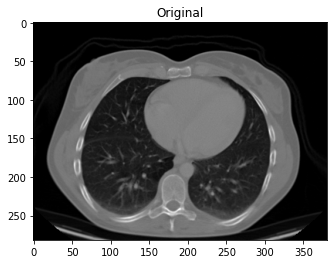

In [19]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

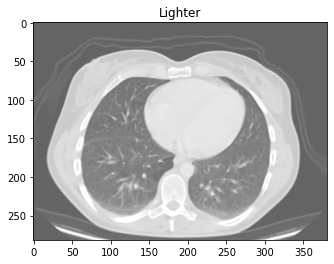

In [20]:
# increasing the pixel intensities in our input image by 100 is
# accomplished by constructing a NumPy array that has the *same
# dimensions* as our input image, filling it with ones, multiplying
# it by 100, and then adding the input image and matrix together
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
plt_imshow("Lighter", added)

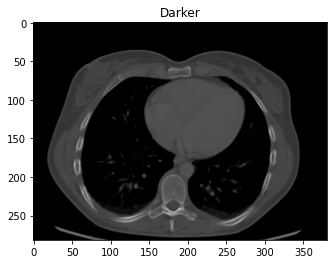

In [21]:
# similarly, we can subtract 50 from all pixels in our image and make it
# darker
M = np.ones(image.shape, dtype="uint8") * 50
subtracted = cv2.subtract(image, M)
plt_imshow("Darker", subtracted)